# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

***focus on plot mainly but can use other features***

After you have identified yoru best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasds around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.



# Hint there are class imbalances

# Good Luck

# Functions

In [83]:
# Run model for accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def fit_model(model_ran,X_train,y_train, X_test,y_test):
    model_ran.fit(X_train,y_train)
    return [model_ran.predict(X_test)]


def run_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    
    return [name,
            accuracy_score(y_test, y_prediction_of_a_model),
            cross_val_score(model_ran, X,y, cv=10).mean(),
            precision_score(y_test, y_prediction_of_a_model, average='weighted'),
            recall_score(y_test, y_prediction_of_a_model, average = 'weighted'),
            f1_score(y_test, y_prediction_of_a_model, average='weighted')]
    
    
# Print accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def print_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    print(f'{name} Prediction accuracy is: {accuracy}\n {name} Mean cross validation is: {cross_val}\n  {name} Precision score is: {precision}\n   {name} Prediction recall score is: {recall}\n    {name} Prediction f1 score is: {f1}')





# Plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics,tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import itertools
from itertools import cycle




In [213]:

data = pd.read_csv('movie_train.csv', )
data_2 = pd.read_csv('movie_test.csv', )

print(data.info())


data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 7 columns):
Unnamed: 0      10682 non-null int64
Release Year    10682 non-null int64
Title           10682 non-null object
Plot            10682 non-null object
Director        10682 non-null object
Cast            10513 non-null object
Genre           10682 non-null object
dtypes: int64(2), object(5)
memory usage: 584.2+ KB
None


,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


In [214]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 0 to 3560
Data columns (total 6 columns):
Unnamed: 0      3504 non-null int64
Release Year    3504 non-null int64
Title           3504 non-null object
Plot            3504 non-null object
Director        3504 non-null object
Cast            3504 non-null object
dtypes: int64(2), object(4)
memory usage: 191.6+ KB


### Task #2: Check for missing values:

In [215]:
# Check for NaN values:
data.isnull().sum()
data_2.isnull().sum()

Unnamed: 0       0
Release Year     0
Title            0
Plot             0
Director         0
Cast            57
dtype: int64

In [6]:
data

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action
5,24099,2012,Chupkatha,The film is about an extra-marital affair invo...,Souvick Sarkar and Dipankar,"Payel Roy, Silajit Majumder, Aparajita Auddy, ...",drama
6,6380,1955,Rage at Dawn,"In this film's version of the story, four of t...",Tim Whelan,"Randolph Scott, Forrest Tucker",western
7,9322,1976,Welcome to L.A.,The theme of romantic despair and shallowness ...,Alan Rudolph,"Keith Carradine, Geraldine Chaplin, Harvey Keitel",drama
8,5177,1950,My Blue Heaven,"Kitty Moran (Betty Grable), a radio star, find...",Henry Koster,"Betty Grable, Dan Dailey, Jane Wyatt",comedy
9,10637,1986,Wildcats,Molly McGrath is the daughter of a famed footb...,Michael Ritchie,"Goldie Hawn, Swoosie Kurtz, Nipsey Russell, Ro...",comedy


In [7]:
# # Check for whitespace strings (it's OK if there aren't any!):

# blanks = []  # start with an empty list

# for pl,dr,gn in df.itertuples():  # iterate over the DataFrame
#     if type(gn)==str:            # avoid NaN values
#         if gn.isspace():         # test 'Cast' for whitespace
#             blanks.append(i)     # add matching index numbers to the list
        
# len(blanks)

In [216]:
data['Plot'].value_counts()

data_2['Plot'].value_counts()

Mukundan Menon (Jayaram) runs a magazine called Kerala Today. He is a normal husband who loves his wife Krishnendu (Bhavana) a lot, but she is too possessive about him. She thinks he is not very expressive about his feelings, and is always worried that he might one day fall for some other beautiful girl.\r\nJohn Mathai (Jayasurya) is a photographer in Mukundan's publication. He was neither interested in girls nor keen to get married until he met Sereena (Vandana).\r\nRahul (Indrajith) is just the opposite. He is extremely romantic and never comes home without some cute gifts for his wife, Shreya (Samvrutha Sunil). But she doesn't know that, behind her back, her darling husband is dying to flirt with every woman that he sees.\r\nIt is into the lives of these three couples that a bar singer, Diana (Rima Kallingal), arrives and things take some interesting turns. Diana is seeking to take revenge on Mukundan Menon since it was on his article in Kerala Today that the Maharashtra court took 

### Task #3: Remove NaN values:

In [217]:
data.dropna(inplace=True)

data

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action
5,24099,2012,Chupkatha,The film is about an extra-marital affair invo...,Souvick Sarkar and Dipankar,"Payel Roy, Silajit Majumder, Aparajita Auddy, ...",drama
6,6380,1955,Rage at Dawn,"In this film's version of the story, four of t...",Tim Whelan,"Randolph Scott, Forrest Tucker",western
7,9322,1976,Welcome to L.A.,The theme of romantic despair and shallowness ...,Alan Rudolph,"Keith Carradine, Geraldine Chaplin, Harvey Keitel",drama
8,5177,1950,My Blue Heaven,"Kitty Moran (Betty Grable), a radio star, find...",Henry Koster,"Betty Grable, Dan Dailey, Jane Wyatt",comedy
9,10637,1986,Wildcats,Molly McGrath is the daughter of a famed footb...,Michael Ritchie,"Goldie Hawn, Swoosie Kurtz, Nipsey Russell, Ro...",comedy


In [218]:
data_2

,Unnamed: 0,Release Year,Title,Plot,Director,Cast
0,5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord"
1,32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit"
2,7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan"
3,4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph"
4,7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell"
5,16555,2013,House of Dust,1951 - Having already killed OCD patient Billy...,A.D. Calvo,"Inbar Lavi, Steven Grayhm, Eddie Hassell, Holl..."
6,15630,2009,Fighting,Present day New York City: Shawn MacArthur (Ch...,Dito Montiel,"Channing Tatum, Terrence Howard"
7,13353,1998,The Siege,FBI Special Agent Anthony Hubbard (Denzel Wash...,Edward Zwick,"Denzel Washington, Annette Bening, Tony Shalho..."
8,30711,2006,Jambhavan,"The movie is about Velan (Prashanth), a respon...",Nandhakumar,"Prashanth, Nila, Meghna Naidu"
9,17780,2007,Clubland,Life for shy 21-year-old Tim Maitland (Khan Ch...,Cherie Nowlan,"Khan Chittenden, Emma Booth"


In [10]:
# le = LabelEncoder()
# data['Genre_Label'] = le.fit_transform(data['Genre'])


,Release Year,Title,Plot,Director,Cast,Genre,Genre_Label
0,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror,5
1,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama,4
2,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama,4
3,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama,4
4,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action,0


In [219]:
df=data.copy(deep=True).drop(columns=['Unnamed: 0','Title','Cast','Release Year'])

df2 = data_2.copy(deep=True).drop(columns=['Unnamed: 0','Release Year','Title','Cast'])

df.head()

,Plot,Director,Genre
0,A computer error leads to the accidental relea...,Simon Nuchtern,horror
1,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,drama
2,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,drama
3,Ram and Avtar are both childhood best friends....,Sunil Hingorani,drama
4,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,action


### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


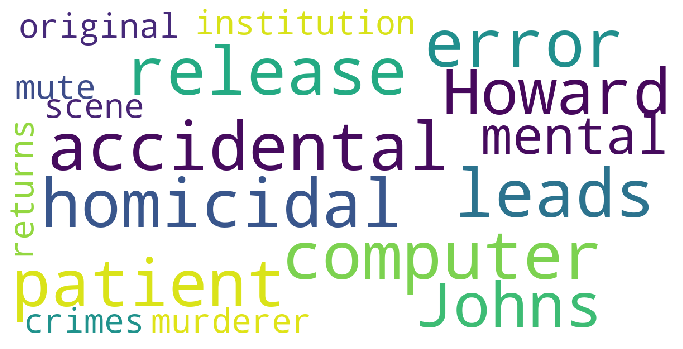

In [13]:
show_wordcloud(data[data['Genre']=='horror']['Plot'][0])

### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [97]:

from sklearn.model_selection import train_test_split



X = df['Plot']
y = df['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)




### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [129]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import re 

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
# parser = English()
# parser = nlp(disable=['parser', 'ner'])
# Creating our tokenizer function




# Creating our tokenizer function
def spacy_tokenizer(text):
    # remove html tags from all of the text before processing
    cleanr = re.compile('<.*?>')
#     cleanr2 = re.compile()
    
    cleantext = re.sub(cleanr, '', text)
    # Creating our token object, which is used to create documents with linguistic annotations.
    # we disabled the parser and ner parts of the pipeline in order to speed up parsing
    mytokens = nlp(cleantext, disable=['parser', 'ner'])

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens





In [114]:
df['Plot'][0]

'A computer error leads to the accidental release of homicidal patient Howard Johns from a mental institution. The mute murderer returns to the scene of his original crimes.[2]'

In [130]:
text = df['Plot'][0]
spacy_tokenizer(text)

['computer',
 'error',
 'lead',
 'accidental',
 'release',
 'homicidal',
 'patient',
 'howard',
 'johns',
 'mental',
 'institution',
 'mute',
 'murderer',
 'return',
 'scene',
 'original',
 'crimes.[2']

In [92]:
spacy_tokenizer(df['Plot'][0])

['computer',
 'error',
 'lead',
 'accidental',
 'release',
 'homicidal',
 'patient',
 'howard',
 'johns',
 'mental',
 'institution',
 'mute',
 'murderer',
 'return',
 'scene',
 'original',
 'crimes.[2']

In [98]:
df['tokenized_sents'] = df.apply(lambda row: spacy_tokenizer(row['Plot']), axis=1)


In [93]:
df

,Plot,Director,Genre,tokenized_sents
0,A computer error leads to the accidental relea...,Simon Nuchtern,horror,"[computer, error, lead, accidental, release, h..."
1,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,drama,"[lonnie, wilson, ken, scott, son, sharecropper..."
2,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,drama,"[gaunt, bushy, bearded, 44-year, old, wes, hol..."
3,Ram and Avtar are both childhood best friends....,Sunil Hingorani,drama,"[ram, avtar, childhood, good, friend, differen..."
4,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,action,"[machete, cortez, danny, trejo, sartana, river..."
5,The film is about an extra-marital affair invo...,Souvick Sarkar and Dipankar,drama,"[film, extra, marital, affair, involve, marrie..."
6,"In this film's version of the story, four of t...",Tim Whelan,western,"[film, version, story, reno, brothers, corrupt..."
7,The theme of romantic despair and shallowness ...,Alan Rudolph,drama,"[theme, romantic, despair, shallowness, displa..."
8,"Kitty Moran (Betty Grable), a radio star, find...",Henry Koster,comedy,"[kitty, moran, betty, grable, radio, star, fin..."
9,Molly McGrath is the daughter of a famed footb...,Michael Ritchie,comedy,"[molly, mcgrath, daughter, famed, football, co..."


In [131]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer,sublinear_tf=True, max_features=1000, min_df = 10, max_df = 0.9)

# vectorize = TfidfVectorizer(max_features=1000, min_df = 50, max_df = 0.85, ngram_range=(1,2))

# tfidf_vector.fit_transform(X_test).toarray()


In [95]:
df

,Plot,Director,Genre,tokenized_sents
0,A computer error leads to the accidental relea...,Simon Nuchtern,horror,"[computer, error, lead, accidental, release, h..."
1,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,drama,"[lonnie, wilson, ken, scott, son, sharecropper..."
2,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,drama,"[gaunt, bushy, bearded, 44-year, old, wes, hol..."
3,Ram and Avtar are both childhood best friends....,Sunil Hingorani,drama,"[ram, avtar, childhood, good, friend, differen..."
4,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,action,"[machete, cortez, danny, trejo, sartana, river..."
5,The film is about an extra-marital affair invo...,Souvick Sarkar and Dipankar,drama,"[film, extra, marital, affair, involve, marrie..."
6,"In this film's version of the story, four of t...",Tim Whelan,western,"[film, version, story, reno, brothers, corrupt..."
7,The theme of romantic despair and shallowness ...,Alan Rudolph,drama,"[theme, romantic, despair, shallowness, displa..."
8,"Kitty Moran (Betty Grable), a radio star, find...",Henry Koster,comedy,"[kitty, moran, betty, grable, radio, star, fin..."
9,Molly McGrath is the daughter of a famed footb...,Michael Ritchie,comedy,"[molly, mcgrath, daughter, famed, football, co..."


In [80]:
# X = bow_vector.fit_transform(X_test).toarray()
# X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
# X = df['tokenized_sents']
# y = df['Genre']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)



In [132]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(class_weight='balance',)  ## class_weight='balance' helps with call inbalances

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])



In [133]:
from sklearn.ensemble import RandomForestClassifier

search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 2, 4)},
               ]
#                 {'classifier': [RandomForestClassifier()],
#                  'classifier__n_estimators': [100, 200],
#                  'classifier__max_features': [3,4]}
#         ]

In [27]:
from sklearn.model_selection import GridSearchCV


# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=3, verbose=2, n_jobs = 1)

In [28]:
# Fit grid search
best_model = clf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.2min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.2min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.1min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.2min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.2min
[CV] classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.2min
[CV] classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.1min
[CV] classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=3, classifier__n_estimators=100 
[CV]  classifier=RandomFore

[CV]  classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=4, classifier__n_estimators=100, total= 2.2min
[CV] classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 51.9min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
# View best model
best_model.best_estimator_.get_params()['classifier']


LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
# model generation
pipe.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=1000,
                                 min_df=10, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pat...\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a3a6a2a60>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [32]:
# Form a prediction set
predictions = pipe.predict(X_test)

Normalized confusion matrix
[[0.39380531 0.00884956 0.18584071 0.00442478 0.32300885 0.01769912
  0.02654867 0.03097345 0.00884956]
 [0.01190476 0.22619048 0.28571429 0.         0.4047619  0.03571429
  0.         0.         0.03571429]
 [0.01343284 0.00746269 0.61044776 0.00149254 0.3238806  0.01791045
  0.0119403  0.00447761 0.00895522]
 [0.0952381  0.         0.32142857 0.05952381 0.45238095 0.01190476
  0.01190476 0.04761905 0.        ]
 [0.01127396 0.00901917 0.16685457 0.00225479 0.78015784 0.00563698
  0.01127396 0.00450958 0.00901917]
 [0.00985222 0.00985222 0.09852217 0.         0.22167488 0.64039409
  0.         0.01970443 0.        ]
 [0.02923977 0.         0.1754386  0.         0.59649123 0.00584795
  0.1871345  0.00584795 0.        ]
 [0.08571429 0.00571429 0.21714286 0.         0.52       0.07428571
  0.00571429 0.09142857 0.        ]
 [0.00775194 0.         0.15503876 0.         0.20155039 0.00775194
  0.         0.         0.62790698]]


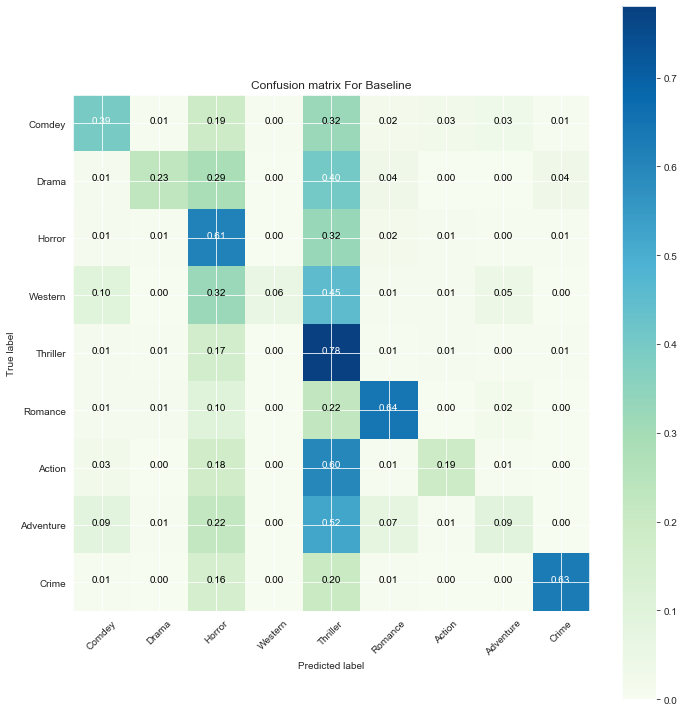

In [36]:
#visual confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
classes = ['Comdey', 'Drama', 'Horror','Western', 'Thriller', 'Romance', 'Action', 'Adventure', 'Crime']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix For Baseline',
                          cmap=plt.cm.GnBu,)

In [37]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.39      0.49       226
           1       0.51      0.23      0.31        84
           2       0.54      0.61      0.57       670
           3       0.56      0.06      0.11        84
           4       0.53      0.78      0.63       887
           5       0.76      0.64      0.70       203
           6       0.55      0.19      0.28       171
           7       0.41      0.09      0.15       175
           8       0.81      0.63      0.71       129

    accuracy                           0.56      2629
   macro avg       0.59      0.40      0.44      2629
weighted avg       0.57      0.56      0.53      2629



In [38]:
# Print the overall accuracy
accuracy = metrics.accuracy_score(y_test,predictions)
print(f'The accuracy score of the classifcation is {accuracy}')
# Print the overall f1 score
f1_weighted = metrics.f1_score(y_test,predictions,average='weighted')
print(f'The weighted f1 score of the classifcation is {f1_weighted}')


The accuracy score of the classifcation is 0.5602890833016356
The weighted f1 score of the classifcation is 0.5296981481851153


### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [220]:
df2['tokenized_sents'] = df2.apply(lambda row: spacy_tokenizer(row['Plot']), axis=1)



# X = df.drop(columns='Genre_Label')
# y = df['Genre_Label']

# X_train, X_test, y_train, y_test = train_test_split(X=, y=, test_size=0.25, random_state=3)
X_train_2 = df['Plot'].copy(deep=True)
y_train_2 = df['Genre'].copy(deep=True)
X_test_2 = df2['Plot'].copy(deep=True)


In [141]:
best_model_2 = clf.fit(X_train_2,y_train_2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.7min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 2.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.4min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 2.7min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 2.7min
[CV] classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.6min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.7min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 2.7min
[CV] classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.6min
[CV] classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.6min
[CV] classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  classifier=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 2.5min
[CV] classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=3, classifier__n_estimators=100 
[CV]  classifier=RandomForestClassi

[CV]  classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=4, classifier__n_estimators=100, total= 2.6min
[CV] classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 68.2min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [142]:
# View best model
best_model_2.best_estimator_.get_params()['classifier']


LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
best_model_2 = LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train_2,y_train_2)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'A computer error leads to the accidental release of homicidal patient Howard Johns from a mental institution. The mute murderer returns to the scene of his original crimes.[2]'

In [221]:
# model generation
pipe.fit(X_train_2,y_train_2)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=1000,
                                 min_df=10, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pat...\b',
                                 tokenizer=<function spacy_tokenizer at 0x1a3a6a2a60>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

In [222]:
prediction_2 = pipe.predict(X_test_2)

In [223]:
prediction_2

array(['drama', 'comedy', 'drama', ..., 'action', 'drama', 'drama'],
      dtype=object)

In [224]:
prediction_2.shape

(3561,)

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

In [232]:
prediction_df = pd.DataFrame(prediction_2)
prediction_df

,0
0,drama
1,comedy
2,drama
3,comedy
4,comedy
5,horror
6,drama
7,action
8,action
9,drama


In [321]:
target = pd.read_csv('movie_test.csv')
data_target = target.merge(prediction_df,how='right', left_index=True, right_index=True)

In [322]:
data_target['Genre Predictions'] = data_target[0].copy(deep=True)

In [182]:
data_target.drop(columns=)

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,0,Genre Predictions
0,5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord",drama,drama
1,32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit",comedy,comedy
2,7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan",drama,drama
3,4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph",comedy,comedy
4,7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell",comedy,comedy
5,16555,2013,House of Dust,1951 - Having already killed OCD patient Billy...,A.D. Calvo,"Inbar Lavi, Steven Grayhm, Eddie Hassell, Holl...",horror,horror
6,15630,2009,Fighting,Present day New York City: Shawn MacArthur (Ch...,Dito Montiel,"Channing Tatum, Terrence Howard",drama,drama
7,13353,1998,The Siege,FBI Special Agent Anthony Hubbard (Denzel Wash...,Edward Zwick,"Denzel Washington, Annette Bening, Tony Shalho...",action,action
8,30711,2006,Jambhavan,"The movie is about Velan (Prashanth), a respon...",Nandhakumar,"Prashanth, Nila, Meghna Naidu",action,action
9,17780,2007,Clubland,Life for shy 21-year-old Tim Maitland (Khan Ch...,Cherie Nowlan,"Khan Chittenden, Emma Booth",drama,drama


In [324]:
data_target.set_index('Unnamed: 0')

,Release Year,Title,Plot,Director,Cast,0,Genre Predictions
Unnamed: 0,,,,,,,
5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord",drama,drama
32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit",comedy,comedy
7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan",drama,drama
4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph",comedy,comedy
7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell",comedy,comedy
16555,2013,House of Dust,1951 - Having already killed OCD patient Billy...,A.D. Calvo,"Inbar Lavi, Steven Grayhm, Eddie Hassell, Holl...",horror,horror
15630,2009,Fighting,Present day New York City: Shawn MacArthur (Ch...,Dito Montiel,"Channing Tatum, Terrence Howard",drama,drama
13353,1998,The Siege,FBI Special Agent Anthony Hubbard (Denzel Wash...,Edward Zwick,"Denzel Washington, Annette Bening, Tony Shalho...",action,action
30711,2006,Jambhavan,"The movie is about Velan (Prashanth), a respon...",Nandhakumar,"Prashanth, Nila, Meghna Naidu",action,action


In [325]:
data_target = data_target.set_index('Unnamed: 0',drop=True)
data_target

,Release Year,Title,Plot,Director,Cast,0,Genre Predictions
Unnamed: 0,,,,,,,
5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord",drama,drama
32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit",comedy,comedy
7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan",drama,drama
4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph",comedy,comedy
7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell",comedy,comedy
16555,2013,House of Dust,1951 - Having already killed OCD patient Billy...,A.D. Calvo,"Inbar Lavi, Steven Grayhm, Eddie Hassell, Holl...",horror,horror
15630,2009,Fighting,Present day New York City: Shawn MacArthur (Ch...,Dito Montiel,"Channing Tatum, Terrence Howard",drama,drama
13353,1998,The Siege,FBI Special Agent Anthony Hubbard (Denzel Wash...,Edward Zwick,"Denzel Washington, Annette Bening, Tony Shalho...",action,action
30711,2006,Jambhavan,"The movie is about Velan (Prashanth), a respon...",Nandhakumar,"Prashanth, Nila, Meghna Naidu",action,action


In [323]:
# data_target.to_csv('target_with_prediction.csv', index = True, header=False)

In [327]:
data_target = data_target.drop(columns=['Release Year','Title', 'Plot', 'Director','Cast',0]).copy(deep=True)


KeyError: "['Release Year' 'Title' 'Plot' 'Director' 'Cast' 0] not found in axis"

In [328]:
data_target

,Genre Predictions
Unnamed: 0,
5075,drama
32149,comedy
7154,drama
4259,comedy
7548,comedy
16555,horror
15630,drama
13353,action
30711,action


In [329]:
data_target.to_csv('finalanswers_SD.csv', index = True, header=False)

In [355]:
data_target['Genre Predictions'].value_counts()

drama        1735
comedy       1002
horror        273
action        198
western       148
romance        86
thriller       66
adventure      33
crime          20
Name: Genre Predictions, dtype: int64

In [356]:
df['Genre'].value_counts()

drama        3673
comedy       2703
action        823
horror        810
thriller      680
romance       644
western       525
adventure     329
crime         326
Name: Genre, dtype: int64

## Great job!